In [2]:
# Parodi Cantero, Giulio Emanuel
# 5.280.521
# Ing. Mecánica

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y):
    # Agregar una columna de unos para el término independiente
    X = np.column_stack((np.ones(len(X)), X))
    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa
    coeficientes = np.linalg.pinv(X.T @ X) @ X.T @ y
    return coeficientes  

# Función para predecir los valores de y
def predecir(X, coeficientes):
    Xm = np.column_stack((np.ones(len(X)), X))
    return Xm @ coeficientes

# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean((error) ** 2))

def r2F(y_true, y_pred):
    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, r2_, rmse_val

In [5]:
opcion = int(input())
# Cargar los datos
data = pd.read_csv('Mediciones.csv')

# Tratamiento de los NaN
data = data.dropna()

In [6]:
# Definir las columnas de características (X) y la columna de objetivo (y)
if opcion == 1:
    # imprimir numero de filas y numero de columnas
    print(data.shape)
    # seleccionar las caracteristicas(variables dependientes) y el objetivo
    caracteristicas = ['VTI_F', 'PEEP', 'BPM', 'VTE_F']
    objetivo = ['Pasos']
    print(caracteristicas)
    print(objetivo)
elif opcion == 2:
    # modelo completo solo con VTI_F, completar la funcion regresion manual
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print(coef)
elif opcion == 3:
    # modelo completo solo con VTI_F, completar las funciones que definen las métricas
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print(coef)
    y_pred = predecir(X, coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    # imprimir los primeros 2 elementos de y e y_pred
    print(y[:2], y_pred[:2])
    # imprimir r2 y rmse
    print(r2_, rmse_val)
elif opcion == 4:
    # modelo completo solo con VTI_F, completar la función ajustar_evaluar_modelo
    X_todo = data[['VTI_F']]
    y = data['Pasos']
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print(r2_todo, rmse_todo)
elif opcion == 5:
    # Completar la combinaciones de características de los modelos solicitados
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F', 'PEEP'],
        'Modelo_4': ['VTI_F', 'BPM', 'PEEP'],
        'Modelo_5': ['VTI_F', 'VTE_F', 'BPM', 'PEEP']
    }
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        print(nombre_modelo, r2, rmse_val)
elif opcion == 6:
    # Modelos para cada combinación de PEEP y BPM
    valores_peep_unicos = data['PEEP'].unique()
    valores_bpm_unicos = data['BPM'].unique()
    print(valores_peep_unicos)
    print(valores_bpm_unicos)
    predicciones_totales = []
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)]
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print(peep, bpm, r2_subset, rmse_subset)
            predicciones_totales.append(y_pred_subset)
    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y = data['Pasos']
    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', r2_global, rmse_global)

[9288.85184784   36.72574487]


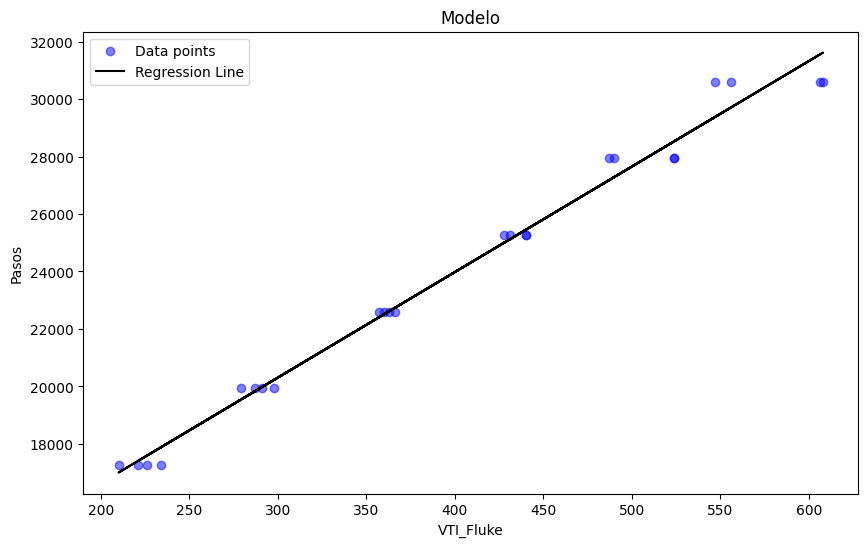

In [8]:
import matplotlib.pyplot as plt

colores = ['blue', 'orange', 'green', 'red']

datos = [
    data[(data['BPM'] == 12) & (data['PEEP'] == 0)],
    data[(data['BPM'] == 10) & (data['PEEP'] == 0)],
    data[(data['BPM'] == 12) & (data['PEEP'] == 10)],
    data[(data['BPM'] == 20) & (data['PEEP'] == 10)]     
]

#for i, (datos_subset, color) in enumerate(zip(datos, colores)):

# Scatter plot of 'VTI_F' vs. 'Pasos'
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(data['VTI_F'], data['Pasos'], color='blue', alpha=0.5, label='Data points')  # Plot data points

# Generate predicted values for the regression line
x_values = pd.DataFrame(data['VTI_F'])
y_predicted = coef[0] + coef[1] * x_values

#label=f'BPM: {datos_subset["BPM"].iloc[0]}, PEEP: {datos_subset["PEEP"].iloc[0]}'
#plt.scatter(X_subset, y_subset, color=colores, label=label)
plt.plot(x_values, y_predicted, color='black', label='Regression Line')  # Plot regression line

# Label your axes, and give your plot a title
plt.xlabel('VTI_Fluke')
plt.ylabel('Pasos')
plt.title('Modelo')
plt.legend()
plt.show()